In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [ ]:
ticker = 'NVDA'

In [ ]:
# Setting the start and end dates to 1 years from the current date (today)
end_date = datetime.now()  # Today's date
start_date = end_date - timedelta(days=1*365)  # 1 year

In [ ]:
# Downloading Nvidia historical data from Yahoo Finance
df = yf.download(ticker, start=start_date, end=end_date)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2023-11-03 00:00:00+00:00,44.991390,45.005001,45.308998,43.723000,44.020000,424610000
2023-11-06 00:00:00+00:00,45.737164,45.750999,45.935001,44.898998,45.285000,400733000
2023-11-07 00:00:00+00:00,45.941105,45.955002,46.217999,45.158001,45.719002,343165000
2023-11-08 00:00:00+00:00,46.559914,46.574001,46.867001,45.967999,46.099998,346719000
2023-11-09 00:00:00+00:00,46.935799,46.950001,48.230000,46.750000,47.466999,540496000


In [ ]:
df.columns

MultiIndex([('Adj Close', 'NVDA'),
            (    'Close', 'NVDA'),
            (     'High', 'NVDA'),
            (      'Low', 'NVDA'),
            (     'Open', 'NVDA'),
            (   'Volume', 'NVDA')],
           names=['Price', 'Ticker'])

In [ ]:
# Resetting the index to make 'Date' a column
df.reset_index(inplace=True)

print(df.head())

Price                       Date  Adj Close      Close       High        Low  \
Ticker                                 NVDA       NVDA       NVDA       NVDA   
0      2023-11-03 00:00:00+00:00  44.991390  45.005001  45.308998  43.723000   
1      2023-11-06 00:00:00+00:00  45.737164  45.750999  45.935001  44.898998   
2      2023-11-07 00:00:00+00:00  45.941105  45.955002  46.217999  45.158001   
3      2023-11-08 00:00:00+00:00  46.559914  46.574001  46.867001  45.967999   
4      2023-11-09 00:00:00+00:00  46.935799  46.950001  48.230000  46.750000   

Price        Open     Volume  
Ticker       NVDA       NVDA  
0       44.020000  424610000  
1       45.285000  400733000  
2       45.719002  343165000  
3       46.099998  346719000  
4       47.466999  540496000  


In [ ]:
# Check if 'Date' is in columns
if 'Date' not in df.columns:
    # Reset index to convert 'Date' from index to column
    df.reset_index(inplace=True)

# Ensure 'Date' column is in datetime format (this should work now)
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
0,2023-11-03 00:00:00+00:00,44.991390,45.005001,45.308998,43.723000,44.020000,424610000
1,2023-11-06 00:00:00+00:00,45.737164,45.750999,45.935001,44.898998,45.285000,400733000
2,2023-11-07 00:00:00+00:00,45.941105,45.955002,46.217999,45.158001,45.719002,343165000
3,2023-11-08 00:00:00+00:00,46.559914,46.574001,46.867001,45.967999,46.099998,346719000
4,2023-11-09 00:00:00+00:00,46.935799,46.950001,48.230000,46.750000,47.466999,540496000


In [ ]:
# Setting up the plot style
sns.set(style="whitegrid")

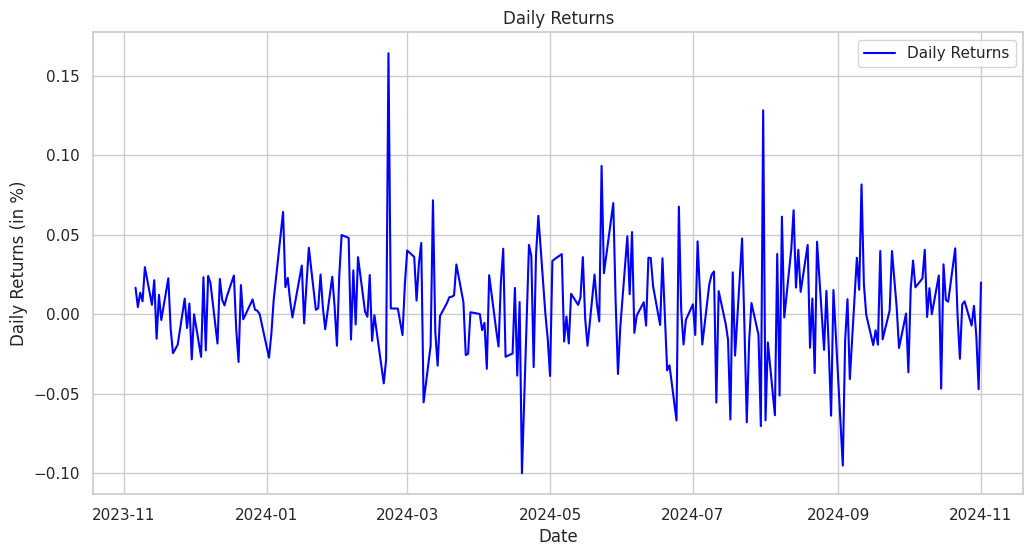

In [ ]:
# Feature 1: Daily Returns
df['Daily_Returns'] = df['Close'].pct_change()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Daily_Returns'], label='Daily Returns', color='blue')
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Returns (in %)')
plt.legend()
plt.show()

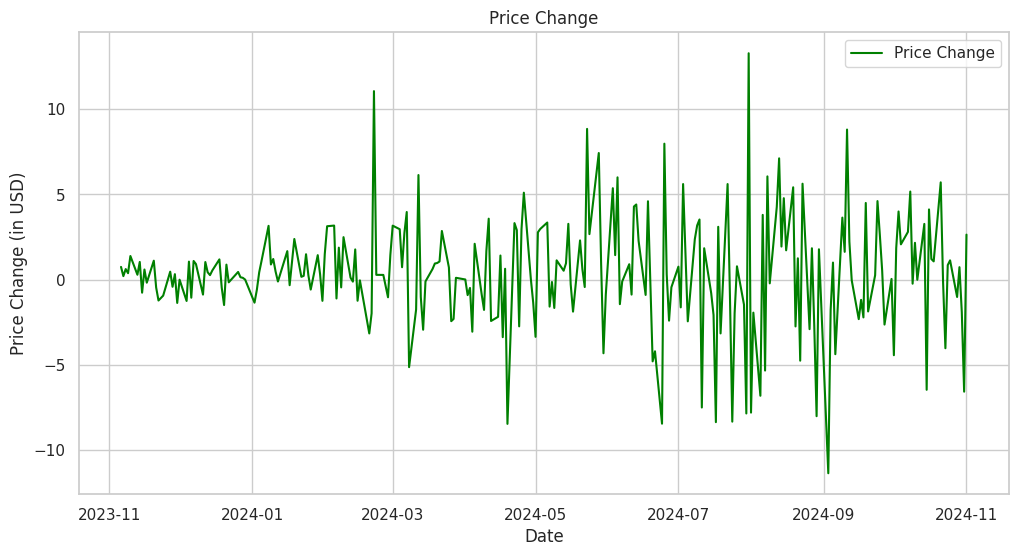

In [ ]:
# Feature 2: Price Change
df['Price_Change'] = df['Close'].diff()


plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price_Change'], label='Price Change', color='green')
plt.title('Price Change')
plt.xlabel('Date')
plt.ylabel('Price Change (in USD)')
plt.legend()
plt.show()

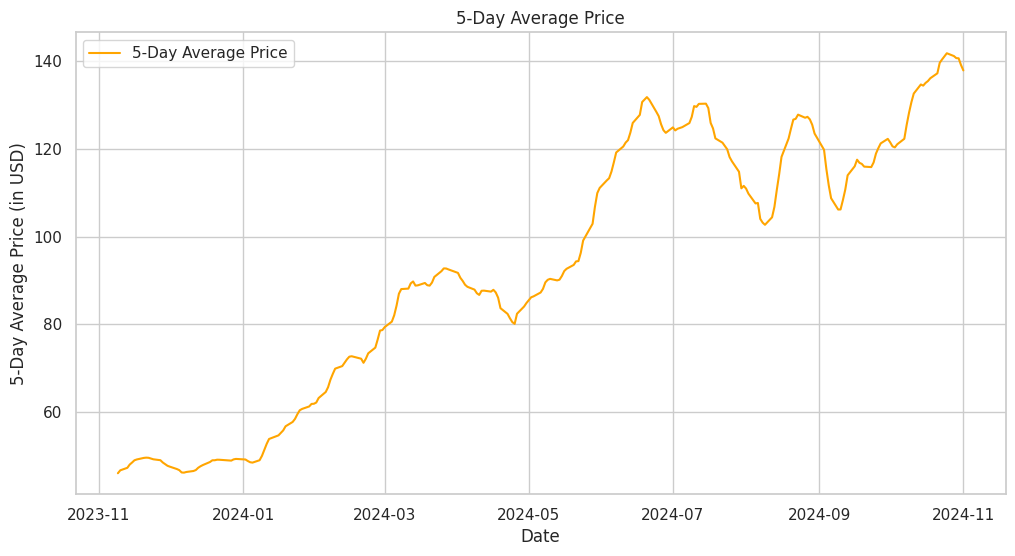

In [ ]:
# Feature 3: 5-Day Average Price
df['5-Day_Avg_Price'] = df['Close'].rolling(window=5).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['5-Day_Avg_Price'], label='5-Day Average Price', color='orange')
plt.title('5-Day Average Price')
plt.xlabel('Date')
plt.ylabel('5-Day Average Price (in USD)')
plt.legend()
plt.show()

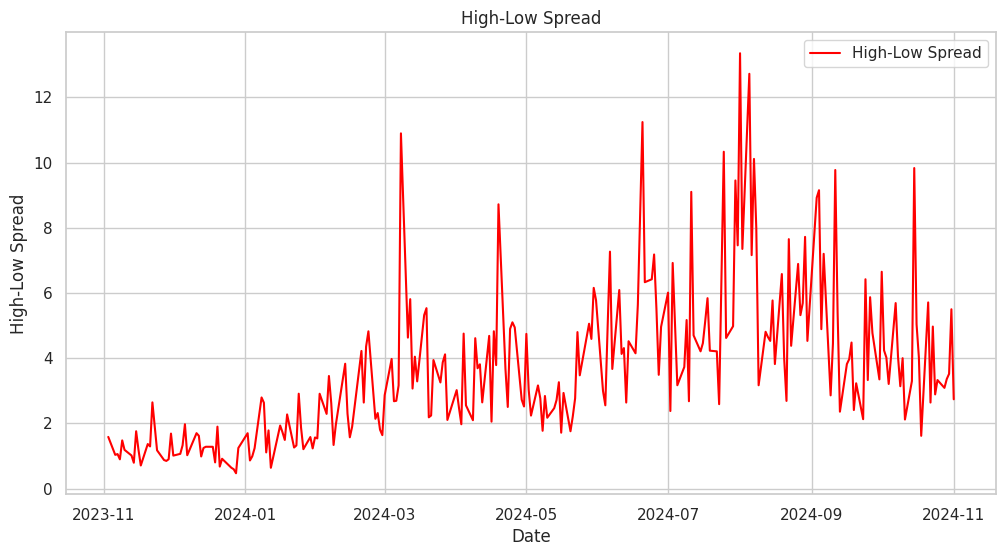

In [ ]:
# Feature 4: High-Low Spread
df['High_Low_Spread'] = df['High'] - df['Low']

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['High_Low_Spread'], label='High-Low Spread', color='red')
plt.title('High-Low Spread')
plt.xlabel('Date')
plt.ylabel('High-Low Spread')
plt.legend()
plt.show()

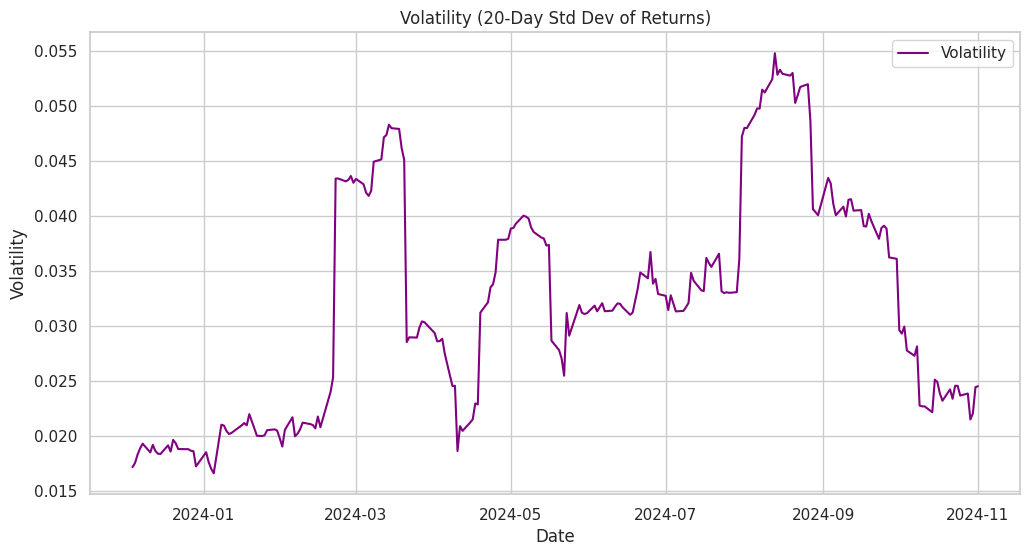

In [ ]:
# Feature 5: Volatility (20-day standard deviation of returns)
df['Volatility'] = df['Daily_Returns'].rolling(window=20).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volatility'], label='Volatility', color='purple')
plt.title('Volatility (20-Day Std Dev of Returns)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


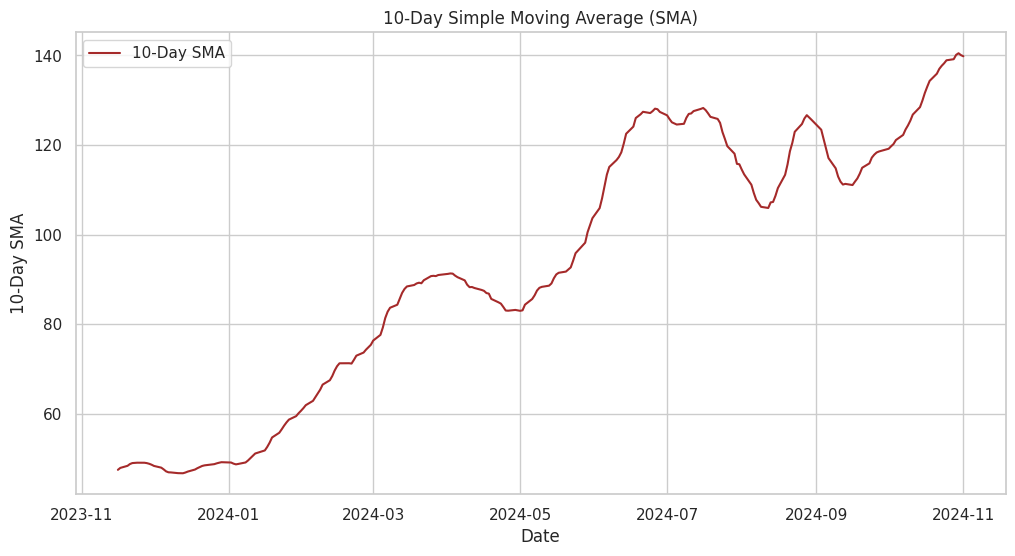

In [ ]:
# Feature 6: 10-Day Simple Moving Average (SMA)
df['10-Day_SMA'] = df['Close'].rolling(window=10).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['10-Day_SMA'], label='10-Day SMA', color='brown')
plt.title('10-Day Simple Moving Average (SMA)')
plt.xlabel('Date')
plt.ylabel('10-Day SMA')
plt.legend()
plt.show()

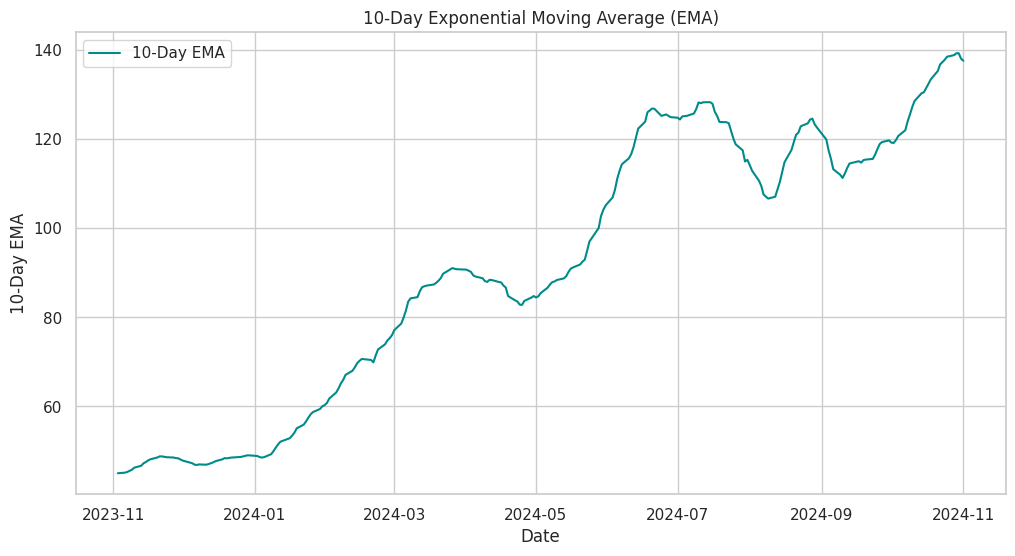

In [ ]:
# Feature 7: 10-Day Exponential Moving Average (EMA)
df['10-Day_EMA'] = df['Close'].ewm(span=10, adjust=False).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['10-Day_EMA'], label='10-Day EMA', color='darkcyan')
plt.title('10-Day Exponential Moving Average (EMA)')
plt.xlabel('Date')
plt.ylabel('10-Day EMA')
plt.legend()
plt.show()


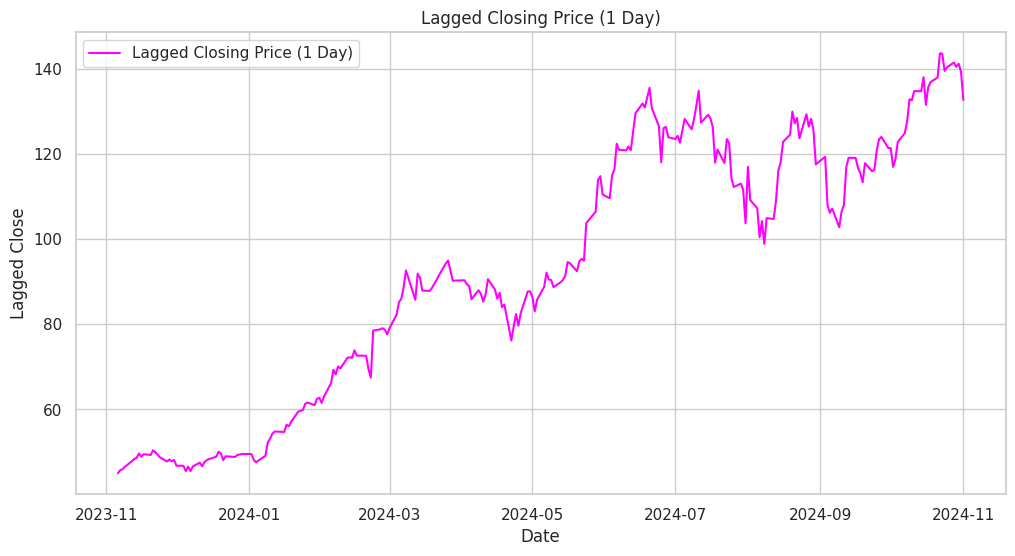

In [ ]:
# Feature 8: Lagged Closing Price (1 day)
df['Lagged_Close'] = df['Close'].shift(1)

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Lagged_Close'], label='Lagged Closing Price (1 Day)', color='magenta')
plt.title('Lagged Closing Price (1 Day)')
plt.xlabel('Date')
plt.ylabel('Lagged Close')
plt.legend()
plt.show()

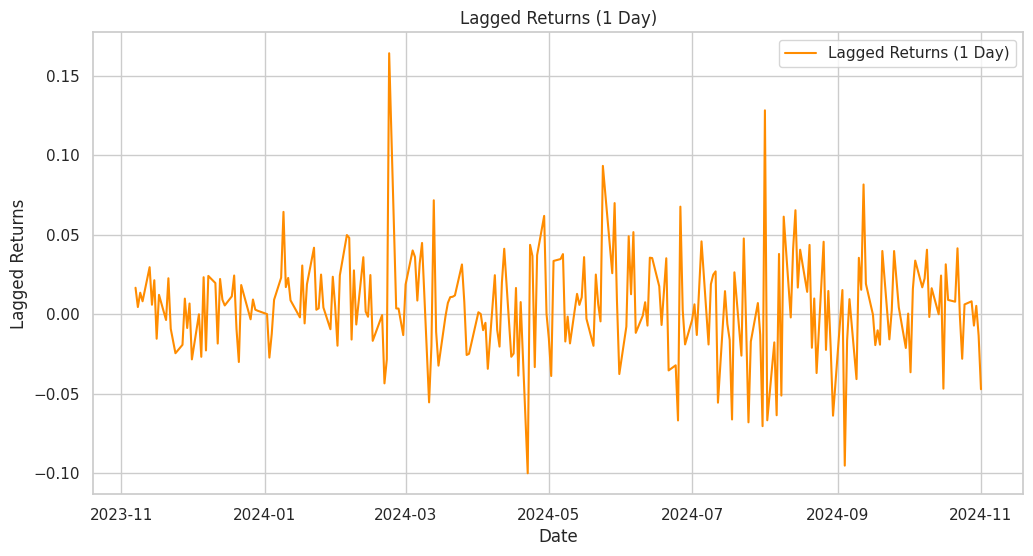

In [ ]:
# Feature 9: Lagged Returns (1 day)
df['Lagged_Returns'] = df['Daily_Returns'].shift(1)

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Lagged_Returns'], label='Lagged Returns (1 Day)', color='darkorange')
plt.title('Lagged Returns (1 Day)')
plt.xlabel('Date')
plt.ylabel('Lagged Returns')
plt.legend()
plt.show()

<ipython-input-19-e52b81993b4d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day_of_Week', data=df, palette='Set1')


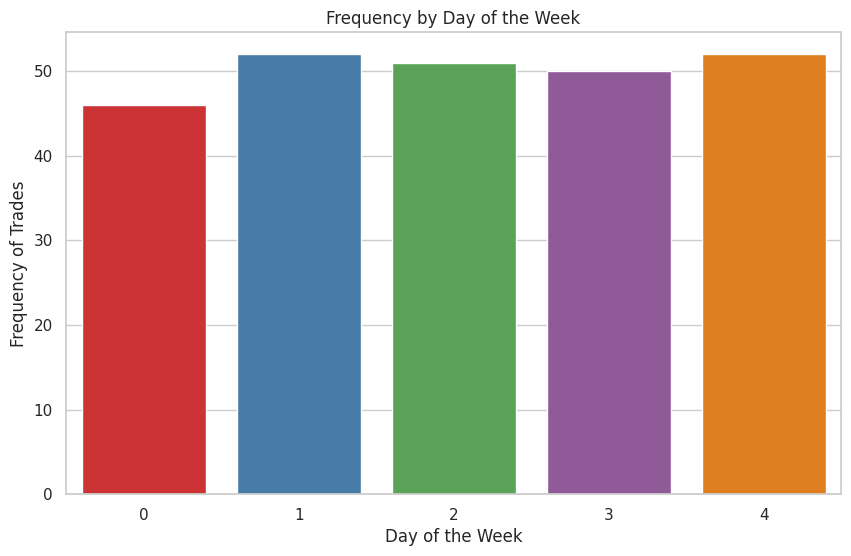

In [ ]:
# Feature 10: Day of the Week
df['Day_of_Week'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6

plt.figure(figsize=(10, 6))
sns.countplot(x='Day_of_Week', data=df, palette='Set1')
plt.title('Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency of Trades')
plt.show()

<ipython-input-20-f416b79ca21f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df, palette='Set2')


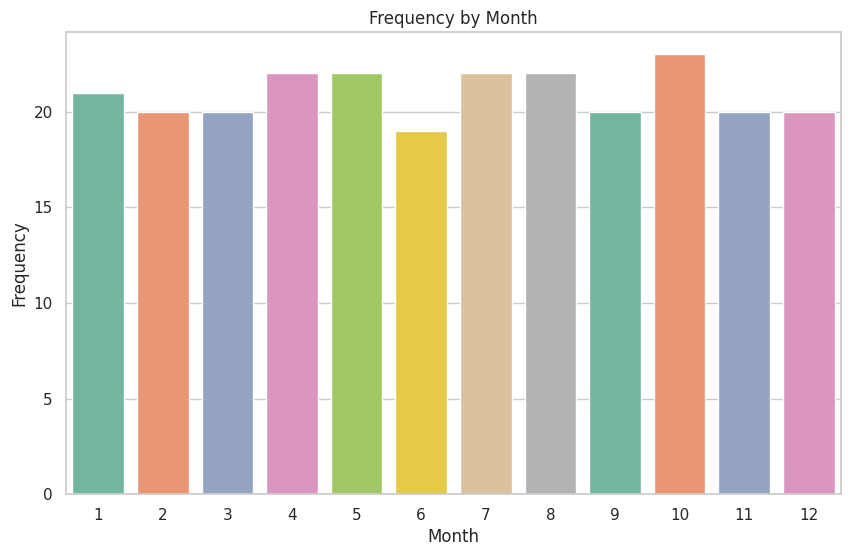

In [ ]:
# Feature 11: Month
df['Month'] = df['Date'].dt.month

plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df, palette='Set2')
plt.title('Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

<ipython-input-21-eeb04538c1e7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=df, palette='Set1')


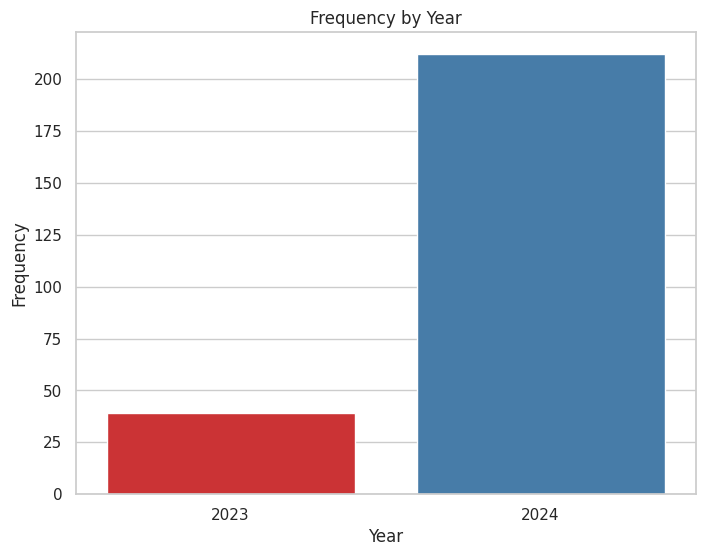

In [ ]:
# Feature 12: Year
df['Year'] = df['Date'].dt.year

plt.figure(figsize=(8, 6))
sns.countplot(x='Year', data=df, palette='Set1')
plt.title('Frequency by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

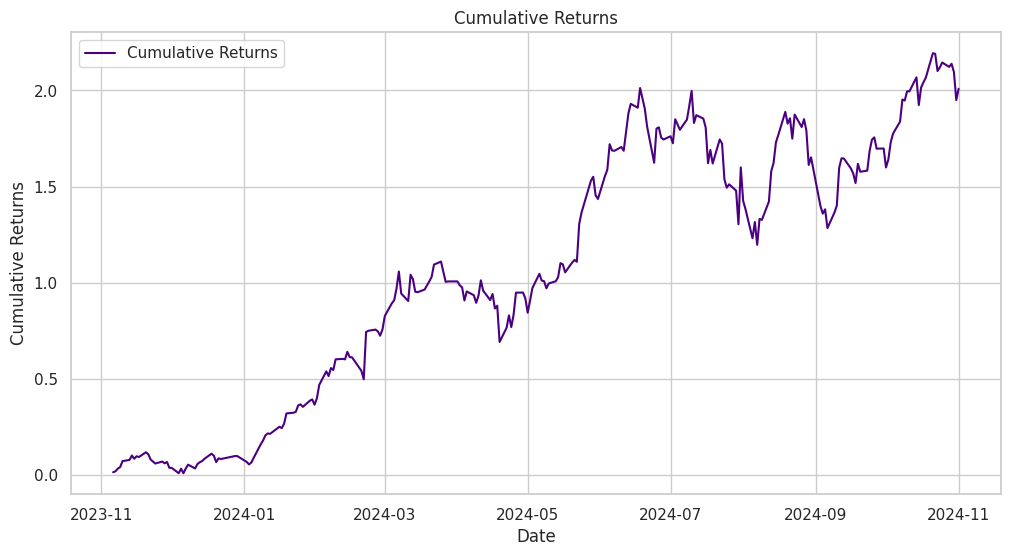

In [ ]:
# Feature 13: Cumulative Returns
df['Cumulative_Returns'] = (1 + df['Daily_Returns']).cumprod() - 1

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Cumulative_Returns'], label='Cumulative Returns', color='indigo')
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

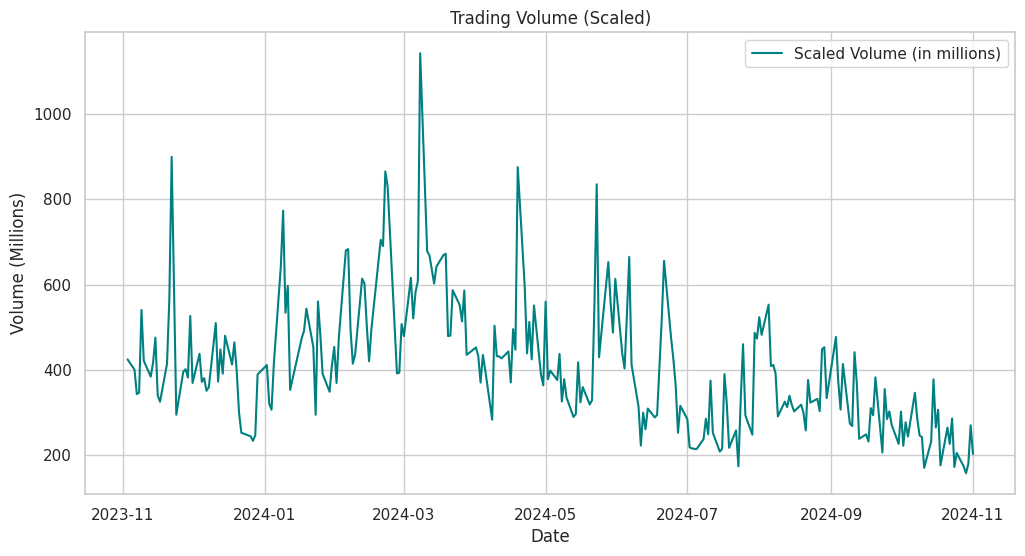

In [ ]:
# Feature 14: Trading Volume (scaled)
df['Scaled_Volume'] = df['Volume'] / 1e6  # Scaling volume for visualization

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Scaled_Volume'], label='Scaled Volume (in millions)', color='teal')
plt.title('Trading Volume (Scaled)')
plt.xlabel('Date')
plt.ylabel('Volume (Millions)')
plt.legend()
plt.show()

## Data Visualisation by Combining Relevant Features

In [ ]:
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume,Daily_Returns,Price_Change,5-Day_Avg_Price,...,Volatility,10-Day_SMA,10-Day_EMA,Lagged_Close,Lagged_Returns,Day_of_Week,Month,Year,Cumulative_Returns,Scaled_Volume
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA,,,,...,,,,,,,,,,
0,2023-11-03 00:00:00+00:00,44.991390,45.005001,45.308998,43.723000,44.020000,424610000,NaN,NaN,NaN,...,NaN,NaN,45.005001,NaN,NaN,4,11,2023,NaN,424.610
1,2023-11-06 00:00:00+00:00,45.737164,45.750999,45.935001,44.898998,45.285000,400733000,0.016576,0.745998,NaN,...,NaN,NaN,45.140637,45.005001,NaN,0,11,2023,0.016576,400.733
2,2023-11-07 00:00:00+00:00,45.941105,45.955002,46.217999,45.158001,45.719002,343165000,0.004459,0.204002,NaN,...,NaN,NaN,45.288703,45.750999,0.016576,1,11,2023,0.021109,343.165
3,2023-11-08 00:00:00+00:00,46.559914,46.574001,46.867001,45.967999,46.099998,346719000,0.013470,0.618999,NaN,...,NaN,NaN,45.522394,45.955002,0.004459,2,11,2023,0.034863,346.719
4,2023-11-09 00:00:00+00:00,46.935799,46.950001,48.230000,46.750000,47.466999,540496000,0.008073,0.375999,46.047001,...,NaN,NaN,45.781959,46.574001,0.013470,3,11,2023,0.043217,540.496


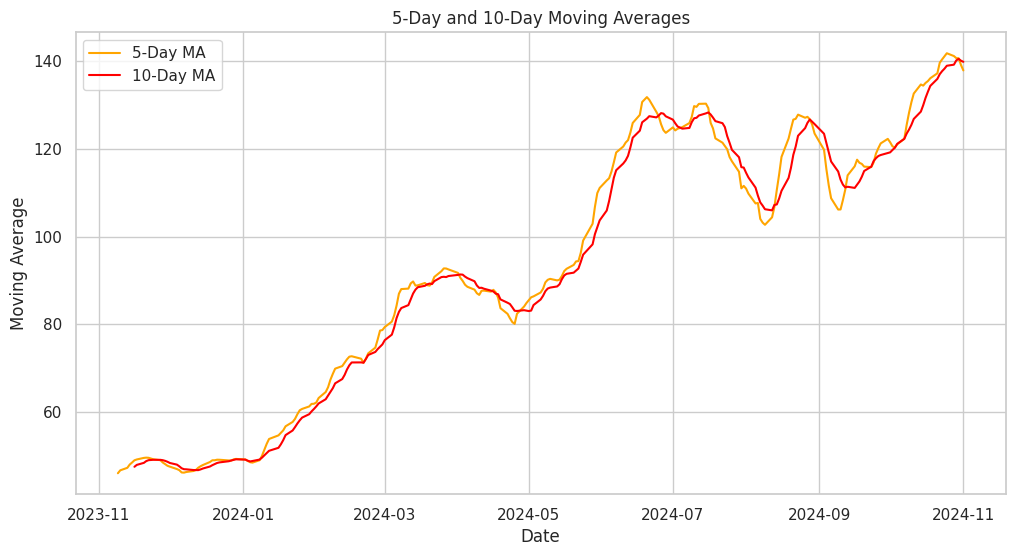

In [ ]:
# 5-Day and 10-Day Moving Average
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['5-Day_Avg_Price'], label='5-Day MA', color='orange')
plt.plot(df['Date'], df['10-Day_SMA'], label='10-Day MA', color='red')
plt.title('5-Day and 10-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.legend()
plt.show()


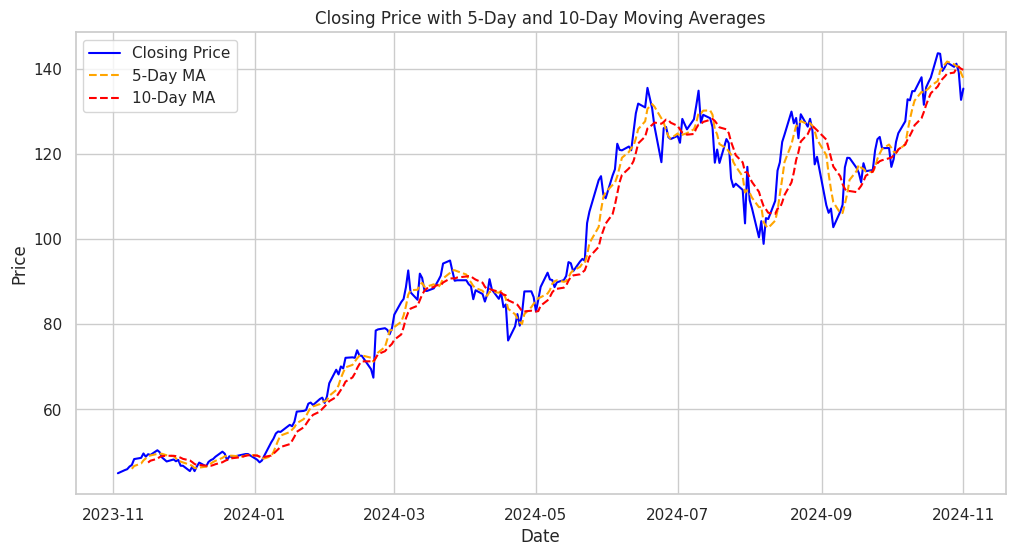

In [ ]:
# Daily Closing Price with Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.plot(df['Date'], df['5-Day_Avg_Price'], label='5-Day MA', color='orange', linestyle='--')
plt.plot(df['Date'], df['10-Day_SMA'], label='10-Day MA', color='red', linestyle='--')
plt.title('Closing Price with 5-Day and 10-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

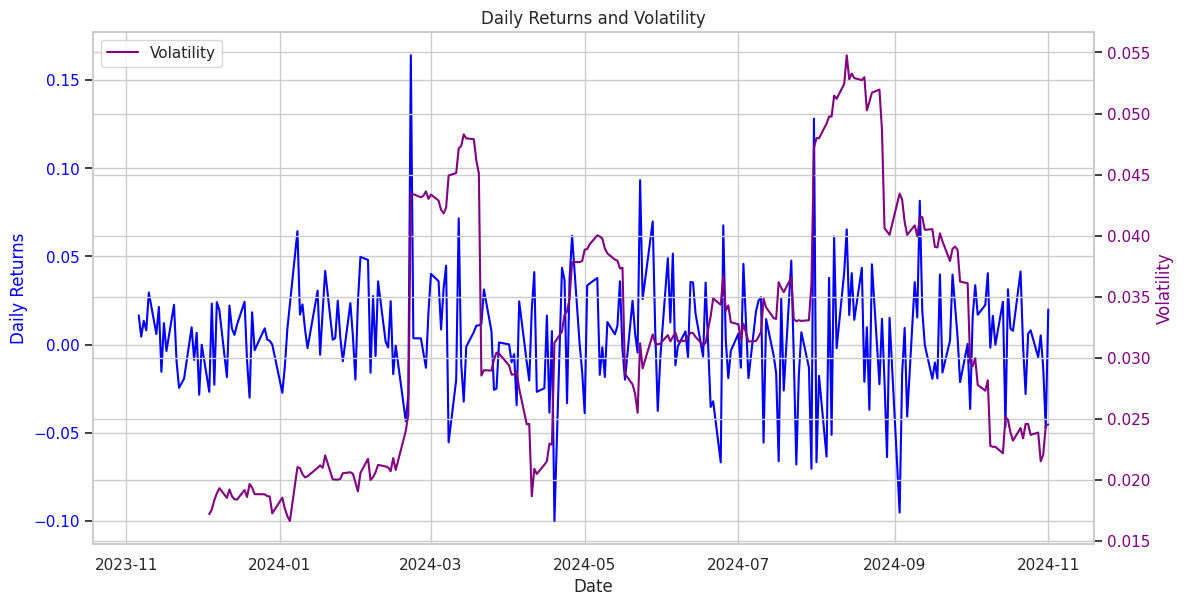

In [ ]:
# Daily Returns and Volatility
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Returns', color='blue')
ax1.plot(df['Date'], df['Daily_Returns'], color='blue', label='Daily Returns')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  # Instantiate a second y-axis sharing the same x-axis
ax2.set_ylabel('Volatility', color='purple')
ax2.plot(df['Date'], df['Volatility'], color='purple', label='Volatility')
ax2.tick_params(axis='y', labelcolor='purple')

fig.tight_layout()
plt.title('Daily Returns and Volatility')
plt.legend(loc="upper left")
plt.show()

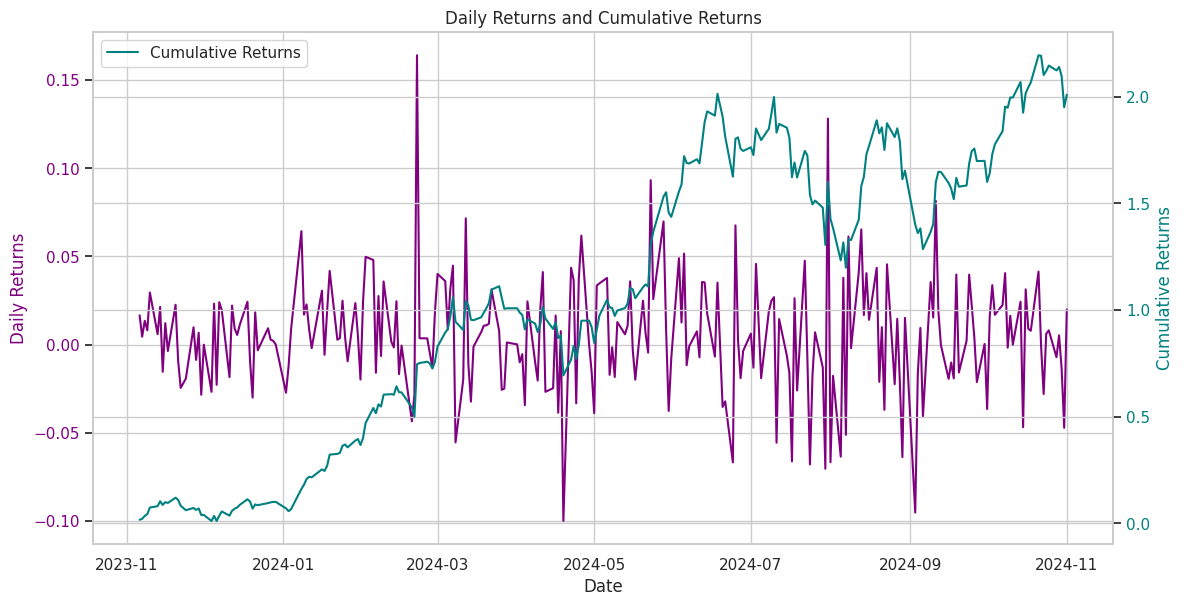

In [ ]:
# Daily Returns and Cumulative Returns
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Returns', color='purple')
ax1.plot(df['Date'], df['Daily_Returns'], color='purple', label='Daily Returns')
ax1.tick_params(axis='y', labelcolor='purple')

ax2 = ax1.twinx()
ax2.set_ylabel('Cumulative Returns', color='teal')
ax2.plot(df['Date'], df['Cumulative_Returns'], color='teal', label='Cumulative Returns')
ax2.tick_params(axis='y', labelcolor='teal')

fig.tight_layout()
plt.title('Daily Returns and Cumulative Returns')
plt.legend(loc="upper left")
plt.show()

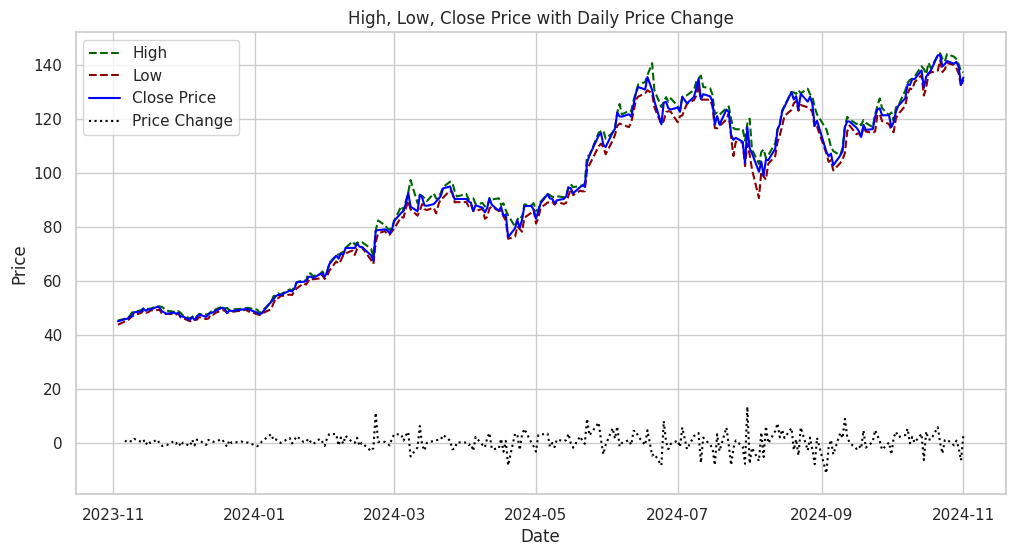

In [ ]:
# High, Low, and Close Price with Price Change
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['High'], label='High', color='darkgreen', linestyle='--')
plt.plot(df['Date'], df['Low'], label='Low', color='darkred', linestyle='--')
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['Price_Change'], label='Price Change', color='black', linestyle=':')
plt.title('High, Low, Close Price with Daily Price Change')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

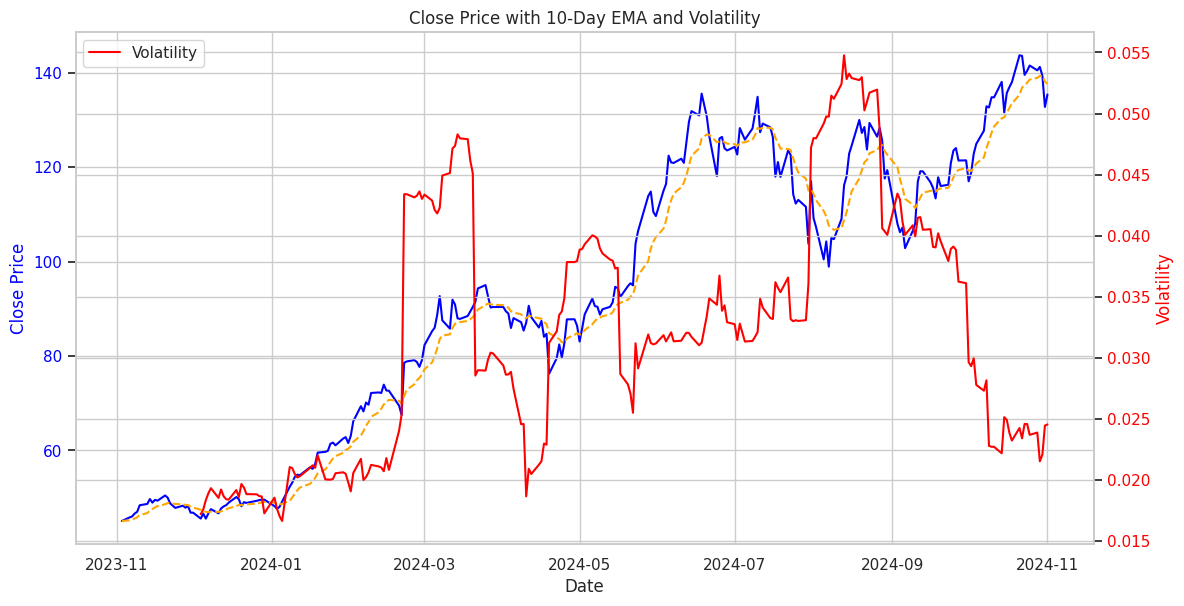

In [ ]:
# Close Price with 10-Day EMA (Exponential Moving Average) and Volatility
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='blue')
ax1.plot(df['Date'], df['Close'], color='blue', label='Close Price')
ax1.plot(df['Date'], df['10-Day_EMA'], color='orange', linestyle='--', label='10-Day EMA')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Volatility', color='red')
ax2.plot(df['Date'], df['Volatility'], color='red', label='Volatility')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.title('Close Price with 10-Day EMA and Volatility')
plt.legend(loc="upper left")
plt.show()

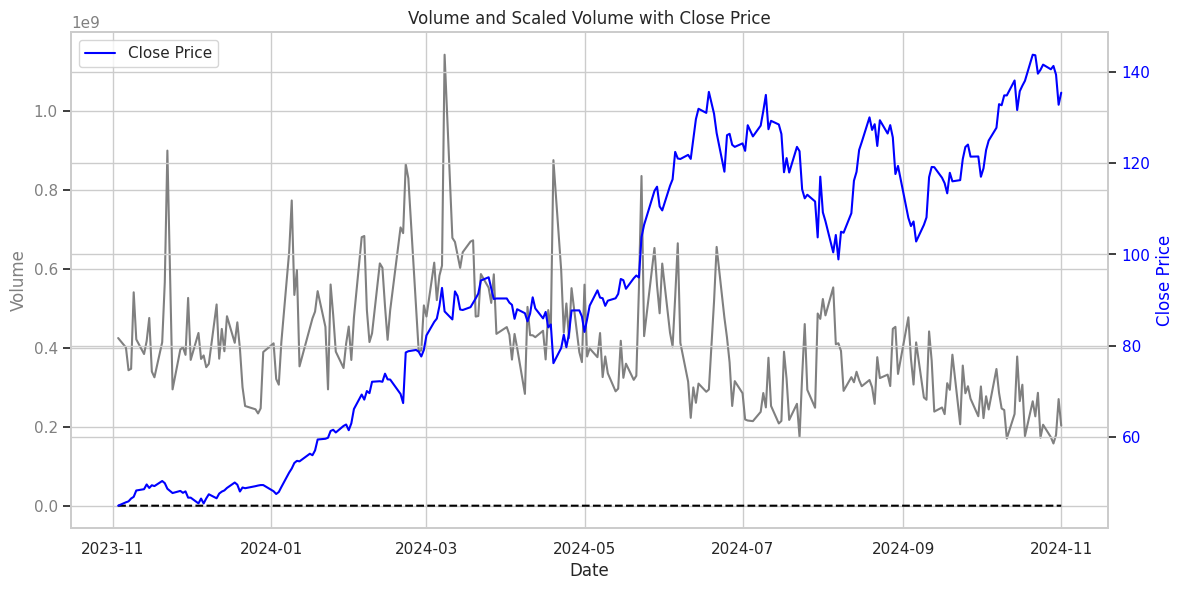

In [ ]:
# Volume and Scaled Volume with Price
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume', color='grey')
ax1.plot(df['Date'], df['Volume'], color='grey', label='Volume')
ax1.plot(df['Date'], df['Scaled_Volume'], color='black', linestyle='--', label='Scaled Volume')
ax1.tick_params(axis='y', labelcolor='grey')

ax2 = ax1.twinx()
ax2.set_ylabel('Close Price', color='blue')
ax2.plot(df['Date'], df['Close'], color='blue', label='Close Price')
ax2.tick_params(axis='y', labelcolor='blue')

fig.tight_layout()
plt.title('Volume and Scaled Volume with Close Price')
plt.legend(loc="upper left")
plt.show()

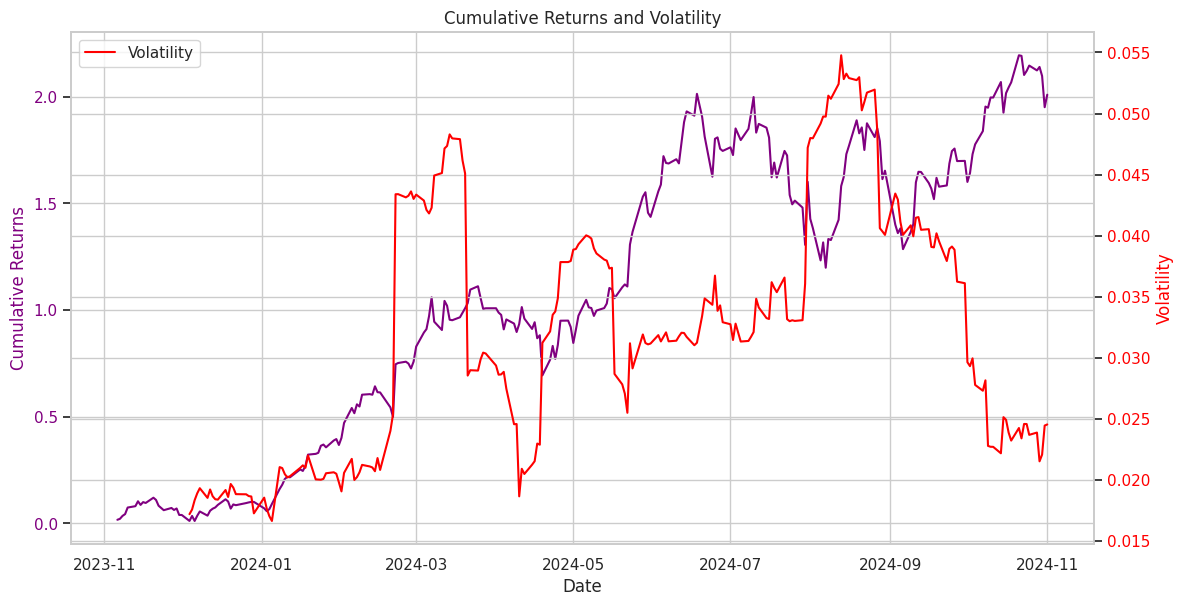

In [ ]:
# Cummulative returns and volatility
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Returns', color='purple')
ax1.plot(df['Date'], df['Cumulative_Returns'], color='purple', label='Cumulative Returns')
ax1.tick_params(axis='y', labelcolor='purple')

ax2 = ax1.twinx()
ax2.set_ylabel('Volatility', color='red')
ax2.plot(df['Date'], df['Volatility'], color='red', label='Volatility')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.title('Cumulative Returns and Volatility')
plt.legend(loc="upper left")
plt.show()

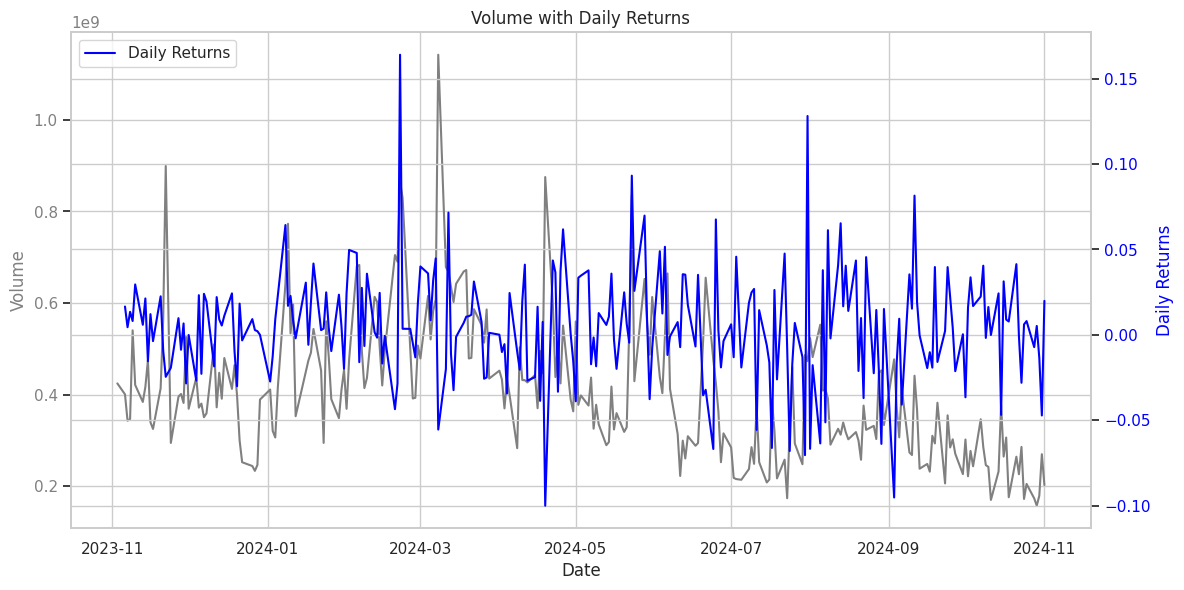

In [ ]:
# Volume with daily returns

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume', color='grey')
ax1.plot(df['Date'], df['Volume'], color='grey', label='Volume')
ax1.tick_params(axis='y', labelcolor='grey')

ax2 = ax1.twinx()
ax2.set_ylabel('Daily Returns', color='blue')
ax2.plot(df['Date'], df['Daily_Returns'], color='blue', label='Daily Returns')
ax2.tick_params(axis='y', labelcolor='blue')

fig.tight_layout()
plt.title('Volume with Daily Returns')
plt.legend(loc="upper left")
plt.show()

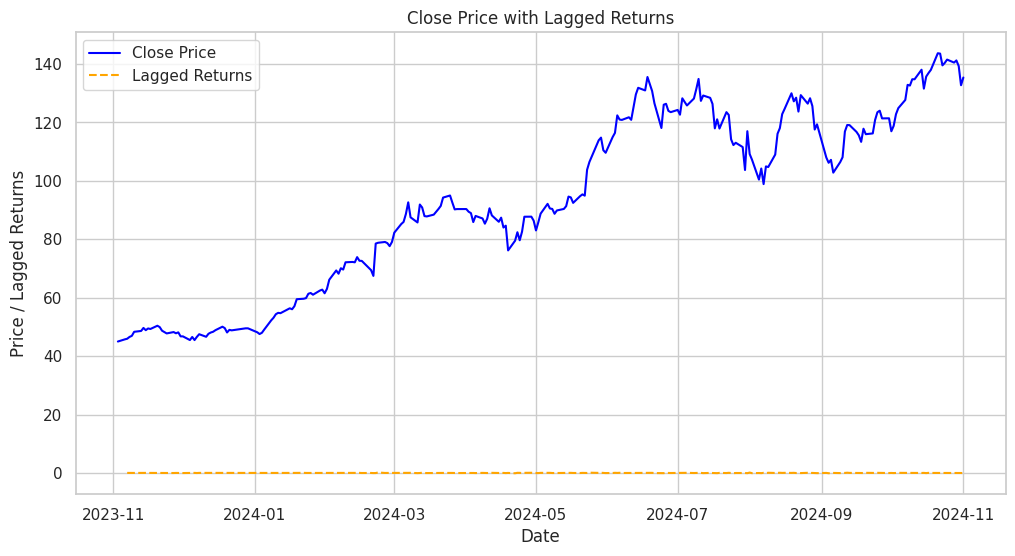

In [ ]:
# Price level and lagged returns
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['Lagged_Returns'], label='Lagged Returns', color='orange', linestyle='--')
plt.title('Close Price with Lagged Returns')
plt.xlabel('Date')
plt.ylabel('Price / Lagged Returns')
plt.legend()
plt.show()

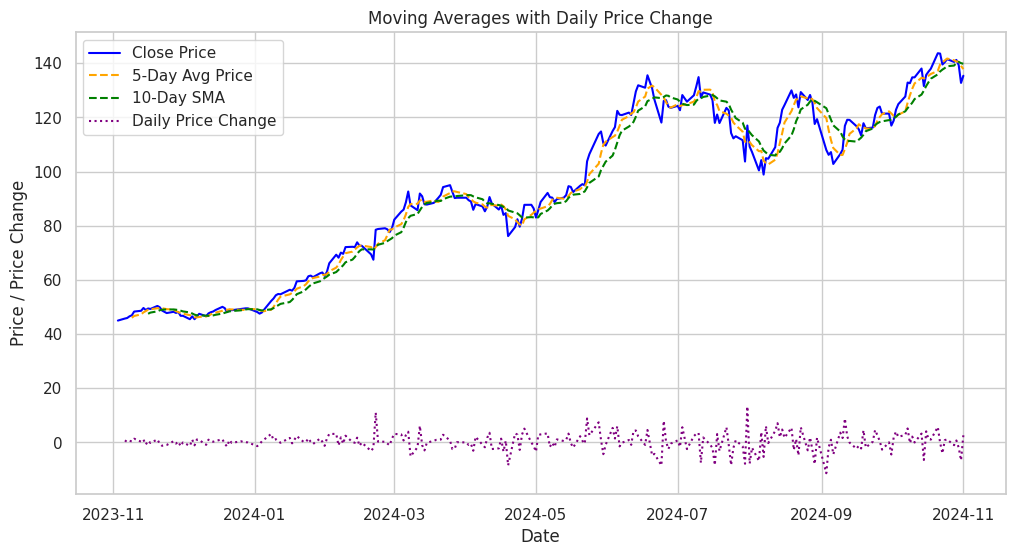

In [ ]:
# Moving average and price change
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['5-Day_Avg_Price'], label='5-Day Avg Price', color='orange', linestyle='--')
plt.plot(df['Date'], df['10-Day_SMA'], label='10-Day SMA', color='green', linestyle='--')
plt.plot(df['Date'], df['Price_Change'], label='Daily Price Change', color='purple', linestyle=':')
plt.title('Moving Averages with Daily Price Change')
plt.xlabel('Date')
plt.ylabel('Price / Price Change')
plt.legend()
plt.show()


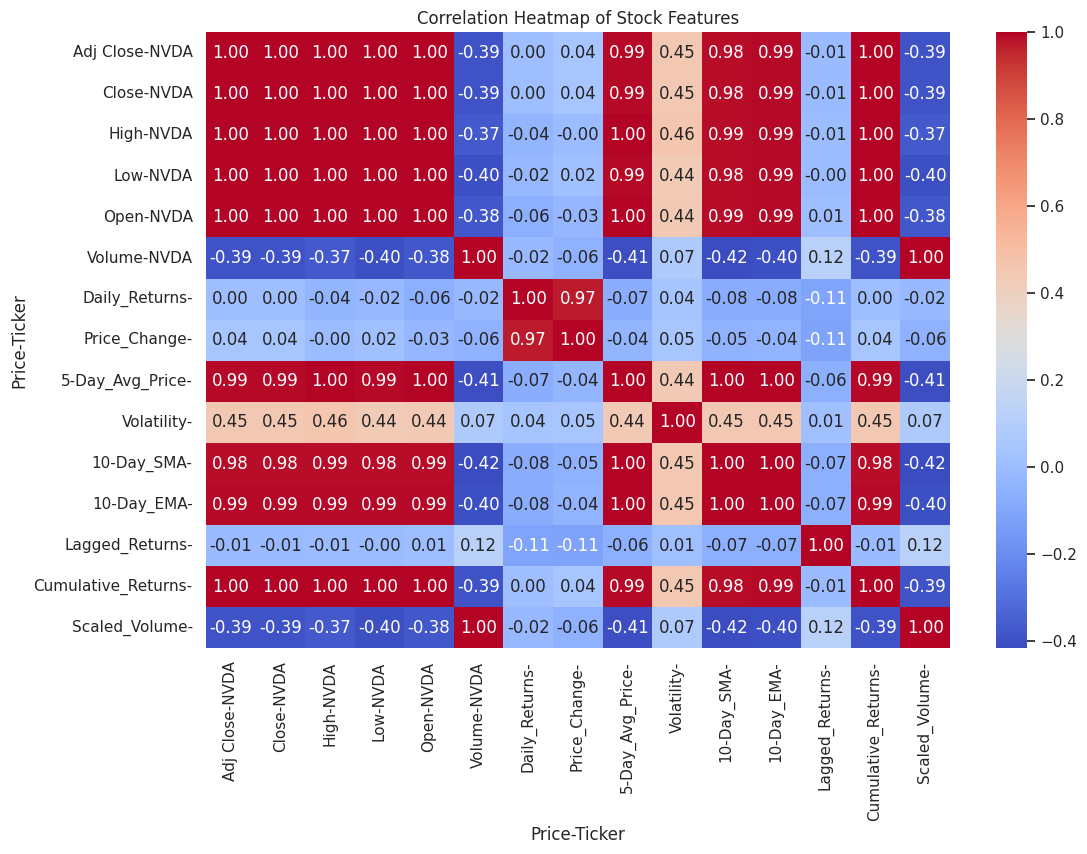

In [ ]:
# Calculating the correlation matrix
corr_matrix = df[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Daily_Returns',
                  'Price_Change', '5-Day_Avg_Price', 'Volatility', '10-Day_SMA', '10-Day_EMA',
                  'Lagged_Returns', 'Cumulative_Returns', 'Scaled_Volume']].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Stock Features')
plt.show()